In [24]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
plt.rcParams['figure.figsize'] = [12,6]

(350, 500, 3)


Text(0.5, 1.0, 'Original Image')

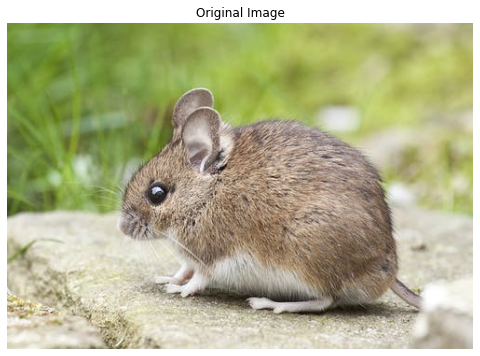

In [88]:
Oimg = imread('Mice.jpeg')
print(Oimg.shape)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

In [89]:
Oimg = np.mean(Oimg,-1)                 # Converting to Grayscale

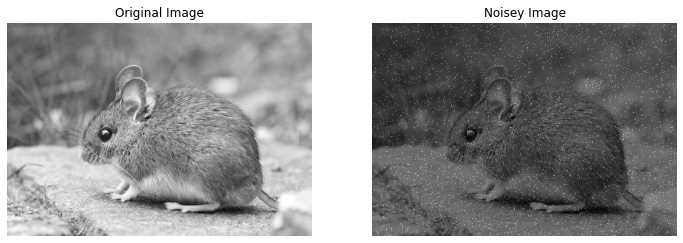

In [91]:

mean = 0
sigma = 0.5

Noise = np.random.normal(mean, sigma, (Oimg.shape[0],Oimg.shape[1])).astype('uint8')
OimgNoisey = Oimg + Noise           # Add some noise

plt.figure(1)
plt.subplot(121)
img = plt.imshow(Oimg)
plt.axis('off')
img.set_cmap('gray')
plt.title("Original Image")

plt.subplot(122)
img2 = plt.imshow(OimgNoisey)
plt.axis('off')
img2.set_cmap('gray')
plt.title("Noisey Image")
plt.show()

In [92]:
print(Oimg.shape)

(350, 500)



e = 1
learning_rate = 0.000001

y = copy.copy(Oimg)
x = copy.copy(OimgNoisey)

it = 1

n = len(x)
d = len(x[0])

m = np.zeros((d,1))
b = np.zeros((d,1))
lmbda = 0.98
while e>(10**(-3)):
    y_predicted = np.zeros((n,d))
    dm = np.zeros((d,1))
    db = np.zeros((d,1))
    m_new = np.zeros((d,1))
    b_new = np.zeros((d,1))
    for i in range(d):
            y_predicted[:,i] = m[i][0]*x[:,i] + b[i][0]
    
    for i in range(d):
        dm[i] = (-2/n)*sum(x[:,i]*(y[:,i]-y_predicted[:,i])) + lmbda*2*m[i][0]
        
        db[i] = (-2/n)*sum(y[:,i]-y_predicted[:,i])

    for i in range(d):
        m_new[i][0] = m[i][0] - learning_rate*dm[i][0]
        b_new[i][0] = b[i][0] - learning_rate*db[i][0]
    max_err_m = 0
    max_err_b = 0
    
    for i in range(d):
            max_err_m = max(max_err_m,abs(m_new[i,0]-m[i,0]))
            max_err_b = max(max_err_b,abs(b_new[i,0]-b[i,0]))
    e = max(max_err_m,max_err_b)        
    
    print(f'Iteration = {it}   accuracy = {e:.15f}')

    it +=1
    m = m_new
    b = b_new


denoised = np.zeros((n,d))

for i in range(d):
            denoised[:,i] = m[i][0]*OimgNoisey[:,i]

In [ ]:
def L2Regularisation():
    

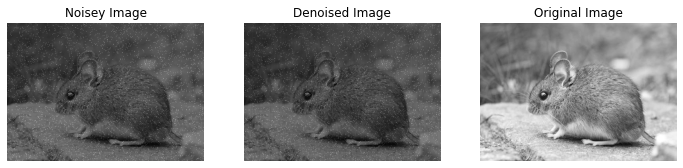

In [107]:
plt.figure()
plt.subplot(131)
img1 = plt.imshow(OimgNoisey)
img1.set_cmap('gray')
plt.axis('off')
plt.title(f'Noisey Image')

plt.subplot(132)
img2 = plt.imshow(denoised)
img2.set_cmap('gray')
plt.axis('off')
plt.title('Denoised Image')

plt.subplot(133)
img3 = plt.imshow(Oimg)
img3.set_cmap('gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

In [108]:
denoised = np.zeros((n,d))

for i in range(d):
            denoised[:,i] = m[i][0]*OimgNoisey[:,i]

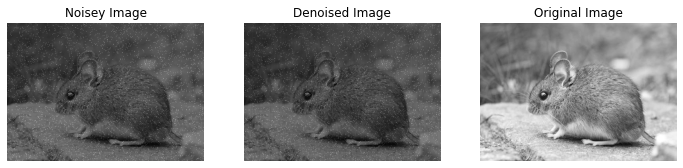

In [109]:
plt.figure()
plt.subplot(131)
img1 = plt.imshow(OimgNoisey)
img1.set_cmap('gray')
plt.axis('off')
plt.title(f'Noisey Image')

plt.subplot(132)
img2 = plt.imshow(denoised)
img2.set_cmap('gray')
plt.axis('off')
plt.title('Denoised Image')

plt.subplot(133)
img3 = plt.imshow(Oimg)
img3.set_cmap('gray')
plt.axis('off')
plt.title('Original Image')
plt.show()